# 03 - Feature Selection
Use Chi-Square, RFE, and RandomForest feature importance to select key predictors.


In [2]:
# Change working directory
import os
os.chdir(r'D:\Books and Courses\Machine Learning\Sprints x Microsoft Summer Camp - AI and Machine Learning\Comprehensive Machine Learning Full Pipeline on Heart Disease UCI Dataset (Graduation Project)\Heart_Disease_Project')

In [3]:
import json, joblib
import numpy as np
from pathlib import Path
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import json


# Load cleaned training data
train_npz = Path('data/cleaned_train.npz')
arr = np.load(train_npz)
X, y = arr['X'], arr['y']

# 1) Chi-Square Test
try:
    k = min(10, X.shape[1])
    skb = SelectKBest(score_func=chi2, k=k)
    skb.fit(X, y)
    chi2_indices = np.argsort(skb.scores_)[-k:]
except Exception:
    chi2_indices = np.array([], dtype=int)

# 2) RFE with Logistic Regression 
lr = LogisticRegression(max_iter=2000)
rfe = RFE(lr, n_features_to_select=min(10, X.shape[1]))
rfe.fit(X, y)
rfe_indices = np.where(rfe.support_)[0]

# 3) Random Forest feature importances 
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)
rf_indices = np.argsort(rf.feature_importances_)[-min(10, X.shape[1]):]

# Combine the three unique indices
selected = sorted(set(chi2_indices.tolist() + rfe_indices.tolist() + rf_indices.tolist()))

# Save the selected feature indices to a JSON file
with open('models/selected_features.json', 'w') as f:
    json.dump({'selected_indices': selected}, f, indent=2)
print('Saved: models/selected_features.json')


Saved: models/selected_features.json


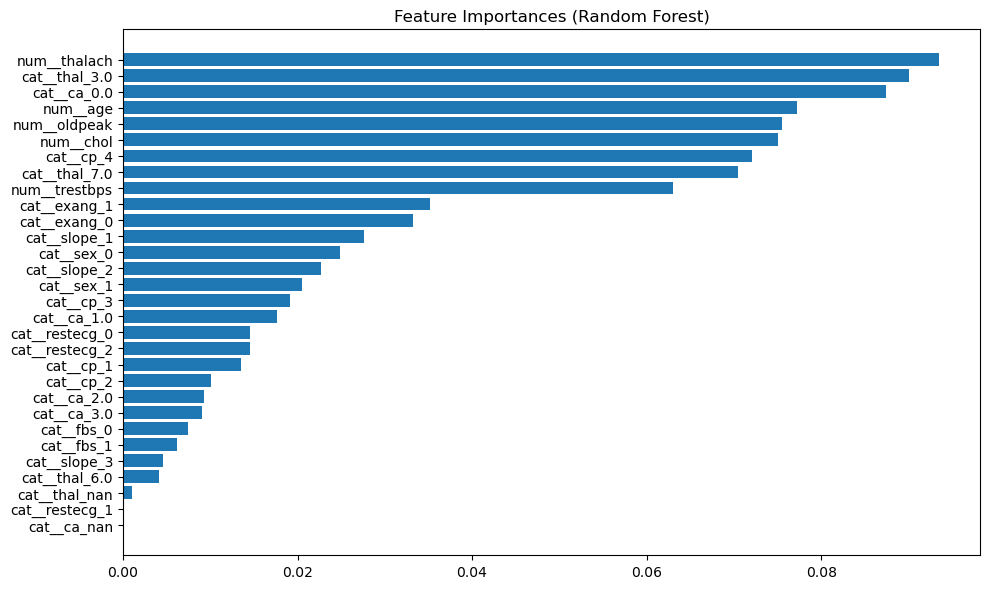

In [ ]:
# Visualize feature importances from Random Forest
import matplotlib.pyplot as plt, numpy as np, joblib
from pathlib import Path

names = joblib.load(Path("models/preprocessor.pkl")).get_feature_names_out()
imps = rf.feature_importances_
idx = np.argsort(imps)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(imps)), imps[idx][::-1])
plt.yticks(range(len(imps)), names[idx][::-1])
plt.title("Feature Importances (Random Forest)"); plt.tight_layout(); plt.show()
